In [2]:
#再變數後面按快捷鍵tab,有屬性或欄位提示
import math
import cv2
import h5py
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from scipy.io import loadmat
from keras.models import Sequential
from keras.models import Model, load_model
from keras.layers import Input, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils import np_utils
from keras import optimizers, initializers
from keras import regularizers
from keras.datasets import mnist
from keras.backend.tensorflow_backend import set_session

Using TensorFlow backend.


In [3]:
data = loadmat('midterm_test')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'y_test', 'x_test', 'num_0', 'num_1', 'num_2', 'num_3', 'num_4', 'num_5', 'num_6', 'num_7', 'num_8', 'num_9', 'num_10', 'num_11', 'num_12', 'num_13', 'num_14', 'num_15', 'num_16', 'num_17', 'num_18'])

In [3]:
X_train = data['x_test']
Y_train = data['y_test']
print("X_train shape :" , X_train.shape)
print("Y_train shape :" , Y_train.shape)

X_train shape : (2000, 48, 170)
Y_train shape : (2000, 4)


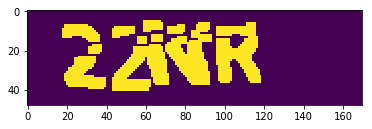

In [4]:
test = X_train[0]
kernel = np.ones((2,2), np.uint8)
#test = cv2.erode(test, kernel, iterations=3)
plt.imshow(test.reshape(48, 170))

In [5]:
for i in range(X_train.shape[0]):
    X_train[i] = cv2.erode(X_train[i], kernel, iterations=3)

In [6]:
X_train = X_train[:, :, :, np.newaxis]
Y_tmp = np_utils.to_categorical(Y_train, num_classes=19)

training_data_num = 0
x_train = X_train[0:training_data_num] / 255.
y_train = Y_tmp[0:training_data_num]
x_test = X_train[training_data_num:X_train.shape[0]] / 255.
y_test = Y_tmp[training_data_num:X_train.shape[0]]

print ("number of training examples = " + str(x_train.shape[0]))
print ("number of test examples = " + str(x_test.shape[0]))
print ("X_train shape: " + str(x_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(x_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 0
number of test examples = 2000
X_train shape: (0, 48, 170, 1)
Y_train shape: (0, 4, 19)
X_test shape: (2000, 48, 170, 1)
Y_test shape: (2000, 4, 19)


In [7]:
model = load_model('VGG16_model_v3.h5')

In [8]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 48, 170, 1)   0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 54, 176, 1)   0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 54, 176, 64)  640         zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 54, 176, 64)  36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_norm

In [9]:
def predict_accuracy(model, x_test, y_test):
    correct_words = 0
    correct_img = 0
    
    y_predict = model.predict(x_test)
    for i in range(x_test.shape[0]):
        cnt = 0
        for j in range(4):
            label = y_predict[j]
            #label[i, :]代表第i筆資料的第j個字為各符號的機率
            if np.argmax(y_test[i, j, :]) == np.argmax(label[i, :]):
                correct_words += 1
                cnt += 1
        if cnt == 4:
            correct_img += 1
                
    total_words = x_test.shape[0]*4
    wrong_words = total_words - correct_words
    
    return wrong_words, correct_words / total_words, correct_img / x_test.shape[0]

In [10]:
wrong_words, word_acc, acc = predict_accuracy(model, x_test, y_test)
print(x_test.shape[0], '_pictures_total_wrong:', wrong_words)
print('one word accuracy:', word_acc)
print('accuracy:', acc)

2000 _pictures_total_wrong: 96
one word accuracy: 0.988
accuracy: 0.9565


In [11]:
def show_result(model, X_train, x_test, y_test):
    dict = {0:'2', 1:'3', 2:'4', 3:'5', 4:'7', 5:'9', 6:'A', 7:'C', 8:'F', 9:'H', 10:'K', 11:'M', 12:'N', 13:'P', 14:'Q', 15:'R', 16:'T', 17:'Y', 18:'Z'}
    y_predict = model.predict(x_test[0:40])
    #印預測結果
    for i in range(40):
        print('predict=[ ', end='')
        cnt = 0
        for j in range(4):
            label = y_predict[j]
            c = np.argmax(label[i, :])
            
            if c != np.argmax(y_test[i, j, :]):
                cnt += 1
            
            if j < 3:
                print("'" + dict[c] + "', ", end='')
            else:
                print("'" + dict[c] + "']")
        
        print('answer=[ ', end='')
        for j in range(4):
            c = np.argmax(y_test[i, j, :])
            if j < 3:
                print("'" + dict[c] + "', ", end='')
            else:
                print("'" + dict[c] + "'], ", end='')
        print('wrong words =', cnt)
    #印預處理結果 
    fig = plt.figure(figsize=(30, 10))
    for i in range(5):
        fig.add_subplot(5, 1, i+1)
        plt.imshow(X_train[training_data_num+i].reshape(48, 170))
    plt.show()

predict=[ '2', '2', 'N', 'R']
answer=[ '2', '2', 'N', 'R'], wrong words = 0
predict=[ '2', '2', 'Y', '5']
answer=[ '2', '2', 'Y', '5'], wrong words = 0
predict=[ '2', '3', '9', 'P']
answer=[ '2', '3', '9', 'P'], wrong words = 0
predict=[ '2', '3', 'F', 'N']
answer=[ '2', '3', 'F', 'N'], wrong words = 0
predict=[ '2', '3', 'Z', 'Q']
answer=[ '2', '3', 'Z', 'Q'], wrong words = 0
predict=[ '2', '7', 'M', '5']
answer=[ '2', '7', 'M', '5'], wrong words = 0
predict=[ '2', 'F', 'A', '9']
answer=[ '2', 'F', 'A', '9'], wrong words = 0
predict=[ '2', 'F', 'T', 'C']
answer=[ '2', 'F', 'T', 'C'], wrong words = 0
predict=[ '2', 'H', 'T', 'M']
answer=[ '2', 'H', 'T', 'M'], wrong words = 0
predict=[ '2', 'M', '3', '4']
answer=[ '2', 'M', '3', '4'], wrong words = 0
predict=[ '2', 'P', '2', '9']
answer=[ '2', 'P', '2', '9'], wrong words = 0
predict=[ '2', 'Q', 'F', 'F']
answer=[ '2', 'Q', 'F', 'F'], wrong words = 0
predict=[ '2', 'R', '9', 'A']
answer=[ '2', 'R', '9', 'A'], wrong words = 0
predict=[ '2

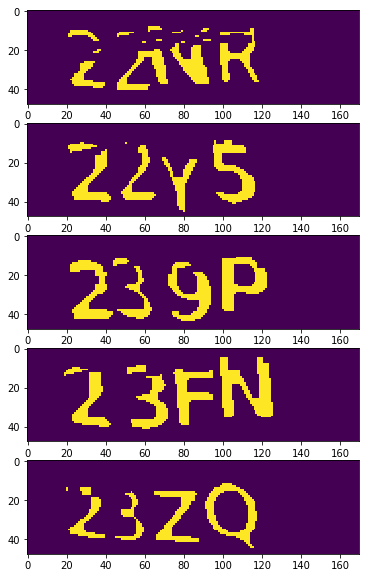

In [12]:
show_result(model, X_train, x_test, y_test)